## Lead Score Case Study

### Problem statement

An education company named X Education sell online courses to industory professionals. The company markets these courses through different marketing channels like marketing websites, search engine and referrals and acquire the leads from these channels.Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Although the company gets lots of leads but the conversion of the leads are very poor, therefore the company wishes to identify the `Hot Leads` and focus more on communicating with potential leads rather than making calls to everyone.

## Step 1 : Import the required libraries

In [1533]:
# Import Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1534]:
# supress warnings:

import warnings
warnings.filterwarnings('ignore')

In [1535]:
# white background style for seaborn plots

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [1536]:
# set the columns and rows to maximum to see all information in the dataset

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Step 2 : Reading and understanding the data

In [1537]:
# Data Preparation:
 # Import the Data set:

Leads = pd.read_csv('Leads.csv')

In [1538]:
# Read the Data set:

Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1539]:
# check the shape of data set:

Leads.shape

(9240, 37)

In [1540]:
# check the info :

Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1541]:
# check describe 

Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1542]:
# check data set

Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 3 : Data Cleansing

In [1543]:
# Data Cleaning:
# lets check null values:

Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1544]:
# null values in percentage:

round(Leads.isnull().sum()/len(Leads.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

##### Below code is commented because in the current data set there is no parameter that have null values greater than 70 %

In [1545]:
# Lets drop null values above 70 %

# Leads = Leads.drop(Leads.loc[:,round(100*(Leads.isnull().sum()/len(Leads.index)),2)>70]).shape

In [1546]:
# we have to handle 'select' as 'null' in data set because no selection is done by the prospect and therefore the default value is captured:

Leads = Leads.replace('Select',np.nan)

In [1547]:
# lets check data set again

Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1548]:
# there are lot of null values in data set
# Lets handle them by imputing or removing those in each column
# Lets handle the columns/ Variables on descending order of Null Values,present in data set

In [1549]:
# lets handle 'Lead Quality':

Leads['Lead Quality']. describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

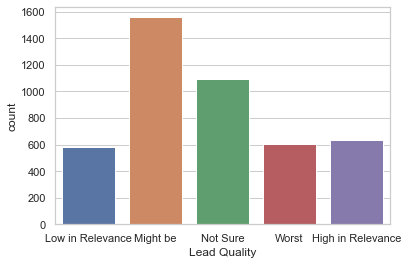

In [1550]:
# lets countplot on 'Lead Quality'

sns.countplot(Leads['Lead Quality'])

In [1551]:
# Lets check most frequent in column:

Leads['Lead Quality'].mode()

0    Might be
dtype: object

In [1552]:
# lets impute 'Might be' in missing values of 'Lead Quality'

Leads['Lead Quality']= Leads['Lead Quality'].fillna(' Might be')

In [1553]:
#check null values in 'Lead Quality':

Leads['Lead Quality'].isnull().sum()

0

In [1554]:
# Lets handle Asymmetrique Activity Index,#Asymmetrique Profile Index, 
# Asymmetrique Activity Score,Asymmetrique Profile Score:

<Figure size 720x1080 with 0 Axes>

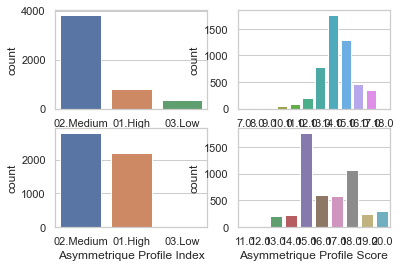

In [1555]:
# Lets countplot on these columns:

plt.figure(figsize=(10,15))
fig,axs=plt.subplots(2,2)
ax1 = sns.countplot(Leads['Asymmetrique Activity Index'],ax=axs[0,0])
ax2 = sns.countplot(Leads['Asymmetrique Activity Score'],ax=axs[0,1])
ax3 = sns.countplot(Leads['Asymmetrique Profile Index'],ax=axs[1,0])
ax4 = sns.countplot(Leads['Asymmetrique Profile Score'],ax=axs[1,1])

In [1556]:
# check the percentage of null values

round(100*(Leads[['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score']].isnull().sum()/len(Leads.index)),2)

Asymmetrique Activity Index    45.65
Asymmetrique Activity Score    45.65
Asymmetrique Profile Index     45.65
Asymmetrique Profile Score     45.65
dtype: float64

In [1557]:
# Lets drop these columns, it has almost 50% null values

Leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1,inplace=True)

In [1558]:
# Lets check again null values in data set:

round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1559]:
# Drop 'Lead Profile' and 'How did you hear about X Education ' as  it has above 70% null values:
 
Leads.drop(['Lead Profile','How did you hear about X Education'],axis=1,inplace=True)

In [1560]:
#check the null values again:

round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1561]:
# Lets deal with 'City' variable:

Leads['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [1562]:
Leads['City'].mode()

0    Mumbai
dtype: object

In [1563]:
# impute the null values with mode() of city

Leads['City']= Leads['City'].fillna('Mumbai')

In [1564]:
# Lets deal with 'Specialization' variable:

Leads['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

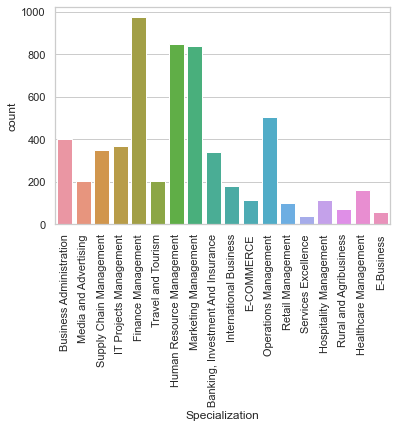

In [1565]:
# Lets plot

ax1=sns.countplot(Leads['Specialization'])
plt.xticks(rotation=90)

In [1566]:
# get the most opted specialization in data set

Leads['Specialization'].mode()

0    Finance Management
dtype: object

In [1567]:
# let fill na with 'Finance Management'

Leads['Specialization']= Leads['Specialization'].fillna('Finance Management')

In [1568]:
#check the null values again:

round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1569]:
# Lets check Tags:

Leads['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

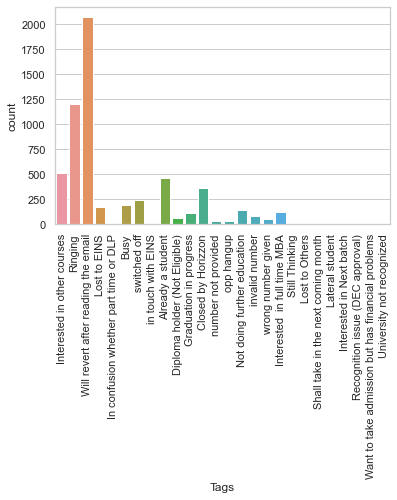

In [1570]:
# Lets plot on Tags

sns.countplot(Leads['Tags'])
plt.xticks(rotation=90)

In [1571]:
# Lets get the mode() of Tags:

Leads['Tags'].mode()

0    Will revert after reading the email
dtype: object

In [1572]:
# Lets fill na with 'Will revert after reading the email':

Leads['Tags']=Leads['Tags'].fillna('Will revert after reading the email')

In [1573]:
# Lets check again the null values:

round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1574]:
# Lets check on 'What matters most to you in choosing a course':

Leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

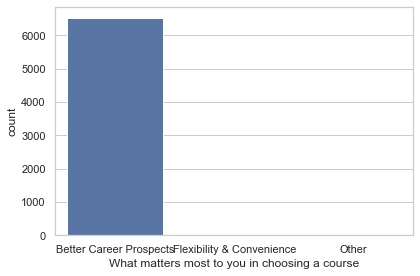

In [1575]:
#lets plot on it:

sns.countplot(Leads['What matters most to you in choosing a course'])
plt.tight_layout()

In [1576]:
Leads['What matters most to you in choosing a course'] = Leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [1577]:
# Lets check again the null values:

round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1578]:
# Lets check on 'What is your current occupation'

Leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

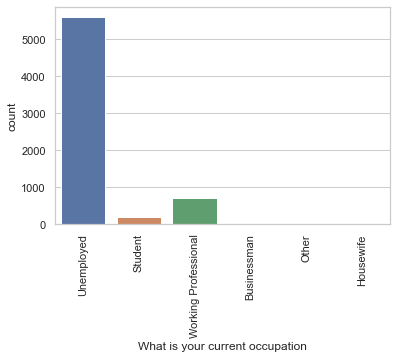

In [1579]:
sns.countplot(Leads['What is your current occupation'])
plt.xticks(rotation=90)

In [1580]:
#fill np.nan values

Leads['What is your current occupation']=Leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [1581]:
# Lets check again the null values:

round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1582]:
#Lets deal with 'Country':

Leads['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

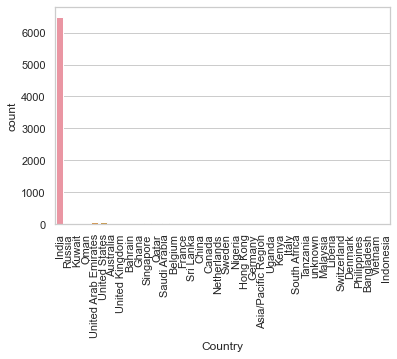

In [1583]:
#Lets plot on it:

sns.countplot(Leads['Country'])
plt.xticks(rotation=90)

In [1584]:
# Lets fill null values:

Leads['Country']=Leads['Country'].replace(np.nan,'India')

In [1585]:
# Lets check again the null values:

round(100*(Leads.isnull().sum()/len(Leads.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [1586]:
# lets drop the null values in data set, it has little as compared to other columns:

Leads.dropna(inplace=True)

In [1587]:
# check null values:

round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [1588]:
# Lets do EDA Part:
# Univariate Analysis:

In [1589]:
# load the data set info:

Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [1590]:
# Our target variable is 'Converted'. Lets check the percantage of converted to 1:

Converted = 100*(sum(Leads['Converted'])/len(Leads['Converted'].index))
Converted

37.85541106458012

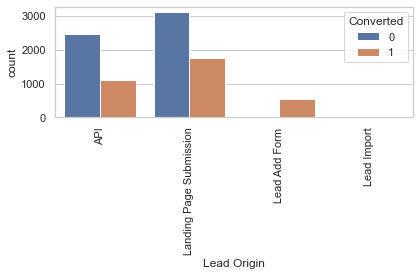

In [1591]:
# lets try analysis on every variable from starting:
# Lead Origin

sns.countplot(data=Leads,x='Lead Origin',hue='Converted')
plt.xticks(rotation=90)
plt.tight_layout()

In [1592]:
# Here, we can see that leads converted more in 'Landing Page Submission'.
# most of Lead Add Form Leads converted.
# Lead Import is very less in number.

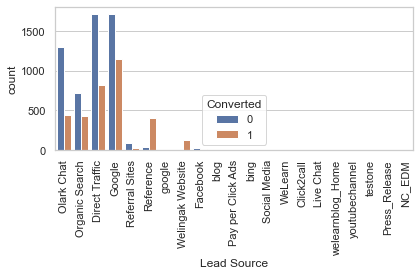

In [1593]:
# Lead Source:

sns.countplot(data=Leads,x='Lead Source', hue='Converted')
plt.xticks(rotation=90)
plt.tight_layout()

In [1594]:
# Google and Direct Traffic creates more Converted Leads.
# Reference showing significant in converting Leads more.

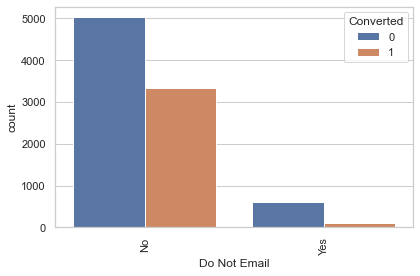

In [1595]:
# Do Not Email:

sns.countplot(data=Leads,x='Do Not Email', hue='Converted')
plt.xticks(rotation=90)
plt.tight_layout()

In [1596]:
# 'No' showing significant number in converting Leads when compared to 'Yes'.

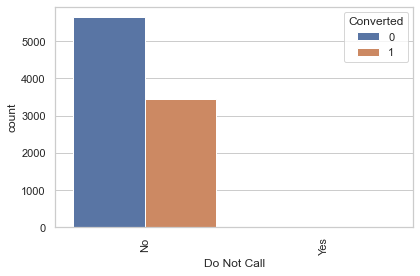

In [1597]:
# Do Not Call:

sns.countplot(data=Leads,x='Do Not Call', hue='Converted')
plt.xticks(rotation=90)
plt.tight_layout()

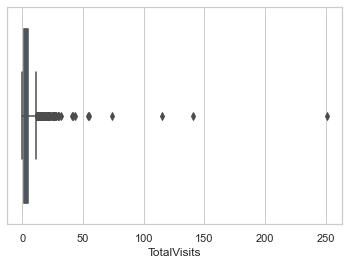

In [1598]:
# TotalVisits:

sns.boxplot(Leads['TotalVisits'])

In [1599]:
# There are lot of Outliers, Lets see quantiles

Leads['TotalVisits'].describe([0.50,0.75,0.90,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [1600]:
quantiles = Leads['TotalVisits'].quantile([0.05,0.95]).values
#quantiles
Leads['TotalVisits'][Leads['TotalVisits']<= quantiles[0]] = quantiles[0]
Leads['TotalVisits'][Leads['TotalVisits']>= quantiles[1]] = quantiles[1]

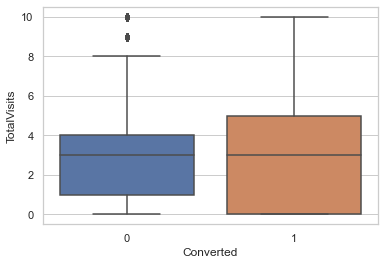

In [1601]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Leads)


In [1602]:
# TotalVisits, spending more time are likely to convert into leads

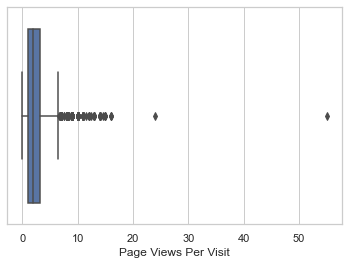

In [1603]:
# Lets check the variabel 'Page Views Per Visit':

sns.boxplot(Leads['Page Views Per Visit'])

In [1604]:
# Lot of Outliers
# we will cap those

In [1605]:
Leads['Page Views Per Visit'].describe([0.50,0.75,0.95,0.99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
50%         2.000000
75%         3.200000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [1606]:
quantiles = Leads['Page Views Per Visit'].quantile([0.05,0.95]).values

In [1607]:
Leads['Page Views Per Visit'][Leads['Page Views Per Visit']<=quantiles[0]] = quantiles[0]
Leads['Page Views Per Visit'][Leads['Page Views Per Visit']>=quantiles[1]] = quantiles[1]

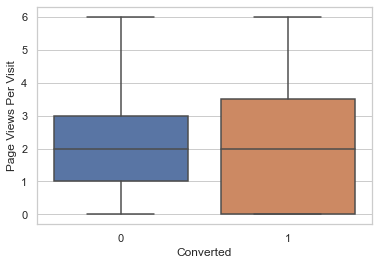

In [1608]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=Leads)

In [1609]:
# Median is same for both cases

In [1610]:
# lets analysis on 'Last Activity'

Leads['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

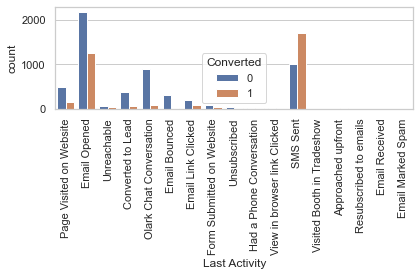

In [1611]:
sns.countplot(Leads['Last Activity'],hue=Leads['Converted'])  
plt.xticks(rotation=90)
plt.tight_layout()

In [1612]:
# Emails and SMS Sent are playing significant role in converting into Leads

In [1613]:
# Lets analysis on Country:

Leads.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

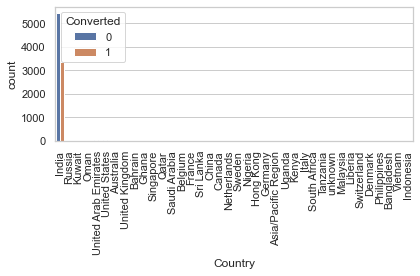

In [1614]:
sns.countplot(Leads['Country'],hue=Leads['Converted'])
plt.xticks(rotation=90)
plt.tight_layout()

In [1615]:
# only Indians are registering here.

In [1616]:
# Lets anlaysis on 'Specialization'

Leads.Specialization.describe()

count                   9074
unique                    18
top       Finance Management
freq                    4241
Name: Specialization, dtype: object

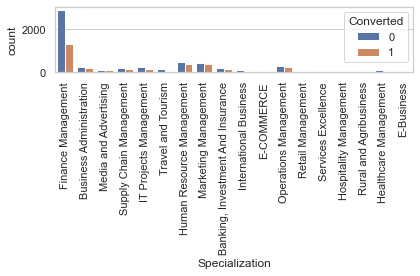

In [1617]:
sns.countplot(Leads['Specialization'],hue=Leads['Converted'])
plt.xticks(rotation=90)
plt.tight_layout()

In [1618]:
# Finance Management doing prettry good in conversion

In [1619]:
# Lets analysis on 'What is your current occupation':

Leads['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

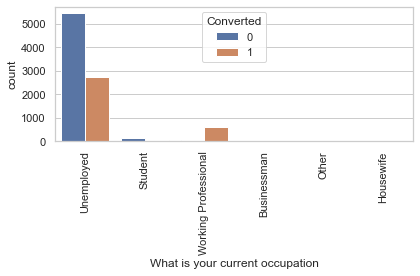

In [1620]:
sns.countplot(Leads['What is your current occupation'],hue=Leads['Converted'])
plt.xticks(rotation=90)
plt.tight_layout()

In [1621]:
# working professionals are high rate of joining in the course
# Unemployeed people tend to join in, it has 50 percent chance of Leads

In [1622]:
# Lets analysis on 'What matters most to you in choosing a course'

Leads['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

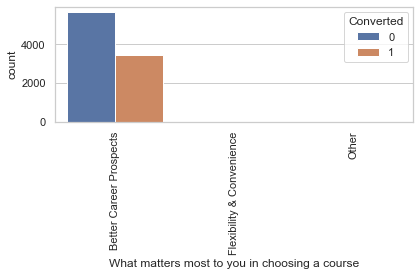

In [1623]:
sns.countplot(Leads['What matters most to you in choosing a course'],hue=Leads['Converted'])
plt.xticks(rotation=90)
plt.tight_layout()

In [1624]:
# Better Career Prospects guys are very intrested in joining, this may give more leads

In [1625]:
# Lets anlaysis on 'Search':

Leads.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

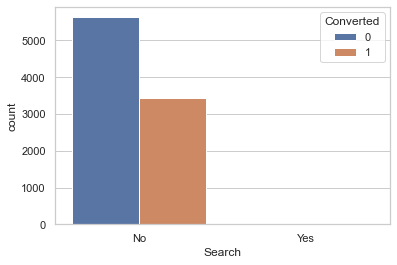

In [1626]:
sns.countplot(Leads['Search'],hue=Leads['Converted'])

In [1627]:
# Most of the people are selected 'No' on Search 


In [1628]:
# Lets anlysis on Magazine

Leads['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

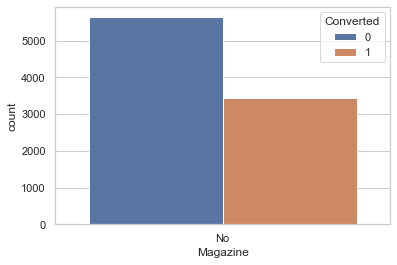

In [1629]:
sns.countplot(Leads['Magazine'],hue=Leads['Converted'])

In [1630]:
# Lets anlaysis on 'Newspaper Article'

Leads['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

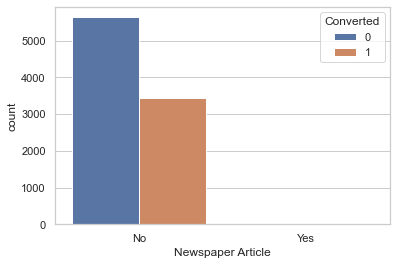

In [1631]:
sns.countplot(Leads['Newspaper Article'],hue=Leads['Converted'])

In [1632]:
# Most of the selection is 'No'


In [1633]:
# Analysis on 'X Education Forums'

Leads['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

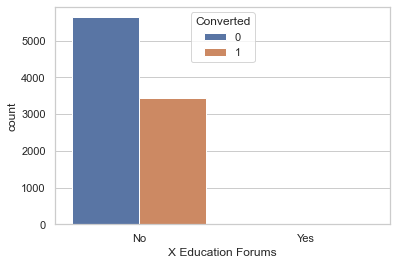

In [1634]:
sns.countplot(Leads['X Education Forums'],hue=Leads['Converted'])

In [1635]:
# Most of the selection is 'No'
# No Use


In [1636]:
# lets anlaysis on 'Newspaper'

Leads['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

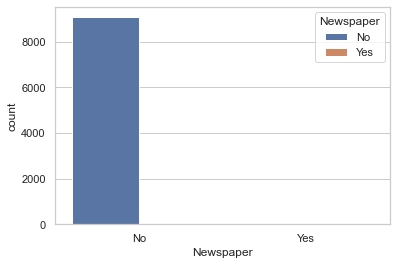

In [1637]:
sns.countplot(Leads['Newspaper'],hue=Leads['Newspaper'])

In [1638]:
# No use

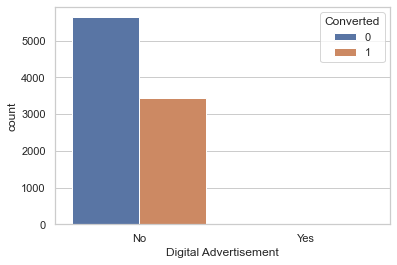

In [1639]:
# Analysis on  Digital Advertisement

sns.countplot(Leads['Digital Advertisement'],hue=Leads['Converted'])

In [1640]:
# No Use, Most of the selection is No.

In [1641]:
# Analysis on 'Through Recommendations
Leads['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [1642]:
# No Inference, No USe

In [1643]:
# Analysis on 'Receive More Updates About Our Courses'

Leads['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [1644]:
# Most entries are 'No'. there is no inference

In [1645]:
# Analysis on 'Tags'

Leads['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

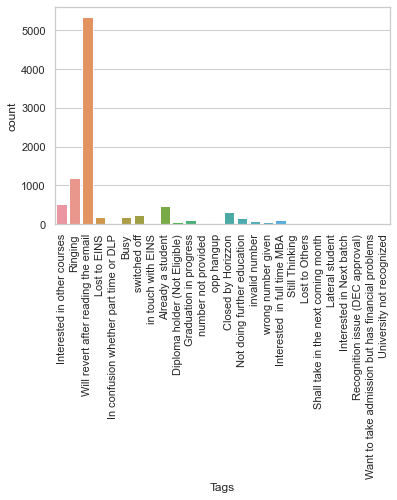

In [1646]:
sns.countplot(Leads['Tags'])
plt.xticks(rotation=90)
plt.tight_layout()

In [1647]:
# Most of the values in Tags column are empty, let we merge those in single value 'Other_Tags'.

Leads['Tags'] = Leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

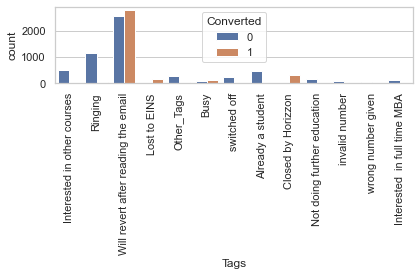

In [1648]:
# Lets plot on that:

sns.countplot(Leads['Tags'],hue=Leads['Converted'])
plt.xticks(rotation=90)
plt.tight_layout()

In [1649]:
# Lead Quality:

Leads['Lead Quality'].describe()

count          9074
unique            6
top        Might be
freq           4720
Name: Lead Quality, dtype: object

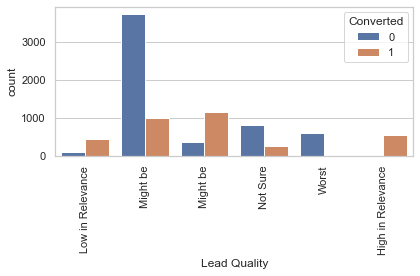

In [1650]:
sns.countplot(Leads['Lead Quality'],hue=Leads['Converted'])
plt.xticks(rotation=90)
plt.tight_layout()

In [1651]:
# Anlaysis on 'Update me on Supply Chain Content'

Leads['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [1652]:
# No Inference

In [1653]:
# Anlaysis on 'Get updates on DM Content'

Leads['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [1654]:
# No Inference

In [1655]:
# Analysis on 'I agree to pay the amount through cheque'

Leads['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [1656]:
# No Inference

In [1657]:
# Anlaysis on 'A free copy of Mastering The Interview'

Leads['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [1658]:
# No Inference

In [1659]:
# Analysis on 'City'

Leads['City'].describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

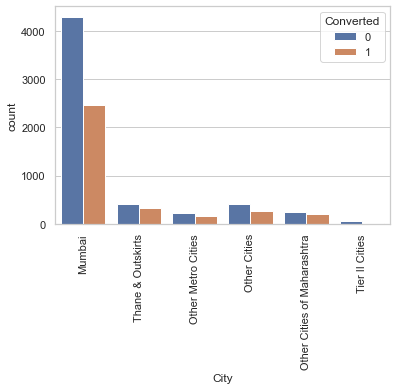

In [1660]:
# Plot on City:

sns.countplot(x = "City", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)

In [1661]:
# We observe that 'Mumbai' people are more intrested.

In [1662]:
# Anlaysis on 'Last Notable Activity'

Leads['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

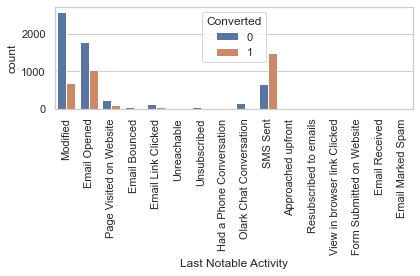

In [1663]:
# Lets plot on :

sns.countplot(Leads['Last Notable Activity'],hue=Leads['Converted'])
plt.xticks(rotation=90)
plt.tight_layout()

In [1664]:
# Emails n SMS are significant in converting into Leads

In [1665]:
# drop the few columns, which are no use to inference in long
# Based on univariate analysis, we got to know few columns are useless to build model.
# Let drop those:

Leads = Leads.drop(['Tags','Lead Quality','Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Last Notable Activity','Last Activity','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','City'],axis=1)

In [1666]:
# check the shape of Leads data set after dropping few columns:

Leads.shape

(9074, 11)

In [1667]:
# head of the data set:

Leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Finance Management,Unemployed
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Finance Management,Unemployed
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Finance Management,Unemployed


In [1668]:
# Data Preparation:

# Converting some binary variables (Yes/No) to 1/0:

In [1669]:
# List of variables to map

varlist=['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads[varlist] = Leads[varlist].apply(binary_map)

In [1670]:
Leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Finance Management,Unemployed
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Finance Management,Unemployed
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Finance Management,Unemployed


In [1671]:
# For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [1672]:
Leads.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [1673]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(Leads[['Lead Origin', 'Lead Source','Specialization', 'What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
Leads = pd.concat([Leads, dummy1], axis=1)


In [1674]:
Leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Finance Management,Unemployed,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Finance Management,Unemployed,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Finance Management,Unemployed,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1675]:
Leads = Leads.drop([ 'Specialization','What is your current occupation','Lead Origin','Lead Source'], axis = 1)

In [1676]:
Leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1677]:
Leads.shape

(9074, 52)

In [1678]:
# Train-Test-Split:

import sklearn
from sklearn.model_selection import train_test_split

In [1679]:
# Putting feature variable to X

X = Leads.drop(['Converted','Prospect ID'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1680]:
# Putting response variable to y

y = Leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1681]:
# Splitting the data into train and test

X_train,X_test,y_train,y_test =  train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1682]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,0,2.0,397,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,1,0,2.0,190,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9226,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4750,0,0,2.0,1380,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7987,0,0,5.0,1584,2.5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1683]:
# Feature Scaling:

from sklearn.preprocessing import StandardScaler

In [1684]:
scaler = StandardScaler()

In [1685]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1686]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1687]:
### Checking the Converted Rate
Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted


37.85541106458012

In [1688]:
# Looking at Correlatins:

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

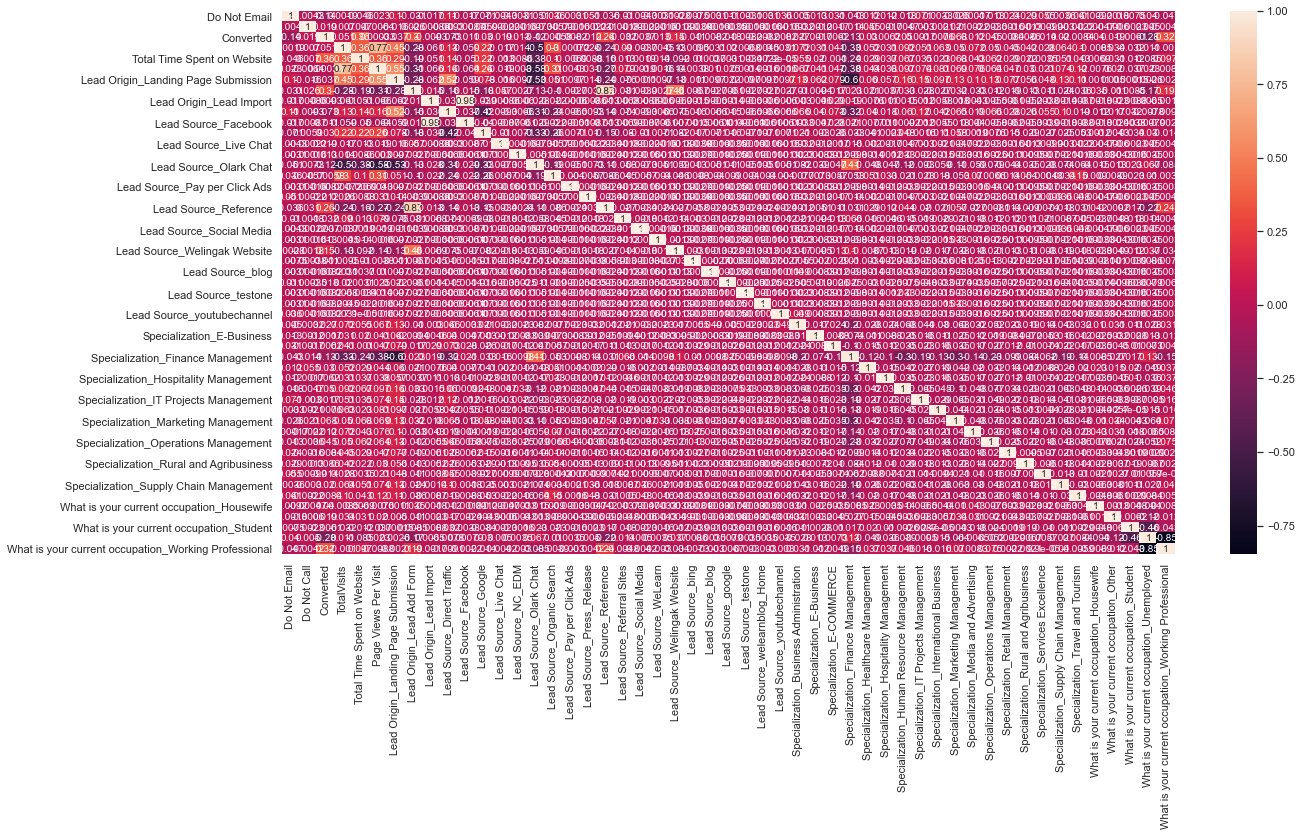

In [1689]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads.corr(),annot = True)
plt.show()

In [1690]:
# Model Building:

# Running Your First Training Model

In [1691]:
import statsmodels.api as sm

In [1692]:
# Logistic regression model

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm)
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6301
Model Family:                Gaussian   Df Model:                           49
Link Function:               identity   Scale:                         0.15503
Method:                          IRLS   Log-Likelihood:                -3067.0
Date:                Sat, 15 May 2021   Deviance:                       976.83
Time:                        12:59:25   Pearson chi2:                     977.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0504      0.395      2.658      0.008       0.276       1.825
Do Not Email                                            -0.1646      0.019     -8.733      0.000      -0.202      -0.128
Do Not Call                                              0.1784      0.280      0.638      0.523      -0.370       0.726
TotalVisits                                              0.0391      0.008      4.926      0.000       0.024       0.055
Total Time Spent on Website                              0.2114      0.006     37.290      0.000       0.200       0.223
Page Views Per Visit                                    -0.0195      0.009     -2.163      0.031      -0.037      -0.002
Lead Origin_Landing Page Submission                     -0.0348      0.017     -2.105      0.035      -0.067      -0.002
Lead Origin_Lead Add Form                               -0.0823      0.279     -0.295      0.768      -0.629       0.464
Lead Origin_Lead Import                                  0.4830      0.404      1.196      0.232      -0.309       1.275
Lead Source_Direct Traffic                              -0.5513      0.361     -1.529      0.126      -1.258       0.155
Lead Source_Facebook                                    -0.7535      0.535     -1.408      0.159      -1.802       0.295
Lead Source_Google                                      -0.4943      0.360     -1.371      0.170      -1.201       0.212
Lead Source_Live Chat                                    0.5010      0.360      1.393      0.164      -0.204       1.206
Lead Source_NC_EDM                                      -0.0552      0.534     -0.103      0.918      -1.102       0.991
Lead Source_Olark Chat                                  -0.3580      0.360     -0.995      0.320      -1.063       0.347
Lead Source_Organic Search                              -0.5231      0.361     -1.450      0.147      -1.230       0.184
Lead Source_Pay per Click Ads                           -0.6843      0.534     -1.281      0.200      -1.731       0.362
Lead Source_Press_Release                               -0.9715      0.536     -1.814      0.070      -2.021       0.078
Lead Source_Reference                                    0.2091      0.229      0.914      0.361      -0.239       0.657
Lead Source_Referral Sites                              -0.6073      0.363     -1.674      0.094      -1.319       0.104
Lead Source_Social Media                                -0.3322      0.456     -0.729      0.466      -1.225       0.561
Lead Source_WeLearn                                   1.814e-15   1.67e-15      1.086      0.278   -1.46e-15    5.09e-15
Lead Source_Welingak Website                             0

In [1693]:
# Feature Selection Using RFE:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1694]:
from sklearn.feature_selection import RFE
rfe= RFE(logreg,15)
rfe = rfe.fit(X_train, y_train)

In [1695]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True])

In [1696]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 17),
 ('Lead Source_Press_Release', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_WeLearn', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_blog', False, 5),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 14),
 

In [1697]:
col = X_train.columns[rfe.support_]

In [1698]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',

In [1699]:
# Assessing the model with StatsModel:


X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2990.7
Date:                Sat, 15 May 2021   Deviance:                       5981.4
Time:                        12:59:34   Pearson chi2:                 6.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0061      1.088      0.006      0.996      -2.126       2.139
Do Not Email                                            -1.5138      0.162     -9.338      0.000      -1.831      -1.196
Total Time Spent on Website                              1.1385      0.038     29.996      0.000       1.064       1.213
Lead Origin_Lead Add Form                                1.4195      1.057      1.343      0.179      -0.651       3.490
Lead Origin_Lead Import                                  1.3280      0.450      2.954      0.003       0.447       2.209
Lead Source_Live Chat                                   23.1983   3.41e+04      0.001      0.999   -6.68e+04    6.68e+04
Lead Source_Olark Chat                                   0.8266      0.092      8.959      0.000       0.646       1.007
Lead Source_Reference                                    2.6805      1.079      2.485      0.013       0.567       4.794
Lead Source_Referral Sites                              -0.5917      0.321     -1.842      0.065      -1.221       0.038
Lead Source_Welingak Website                             4.7187      1.279      3.691      0.000       2.213       7.225
Lead Source_google                                     -21.7874   2.08e+04     -0.001      0.999   -4.07e+04    4.07e+04
What is your current occupation_Housewife               21.5429   1.55e+04      0.001      0.999   -3.04e+04    3.04e+04
What is your current occupation_Other                   -0.4298      1.292     -0.333      0.739      -2.963       2.103
What is your current occupation_Student                 -0.8547      1.107     -0.772      0.440      -3.025       1.315
What is your current occupation_Unemployed              -1.0461      1.089     -0.961      0.337      -3.180       1.088
What is your current occupation_Working Professional     1.7666      1.102      1.603      0.109      -0.394       3.927
========================================================================================================================
"""

In [1701]:
# 'Lead Source_Live Chat' has high P value, remove that column

col1 = col.drop('Lead Source_Live Chat',1)

In [1702]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [1703]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2992.2
Date:                Sat, 15 May 2021   Deviance:                       5984.4
Time:                        13:01:38   Pearson chi2:                 6.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0062      1.088      0.006      0.995      -2.126       2.138
Do Not Email                                            -1.5137      0.162     -9.339      0.000      -1.831      -1.196
Total Time Spent on Website                              1.1377      0.038     29.980      0.000       1.063       1.212
Lead Origin_Lead Add Form                                2.3949      0.897      2.670      0.008       0.637       4.153
Lead Origin_Lead Import                                  1.3267      0.450      2.951      0.003       0.446       2.208
Lead Source_Olark Chat                                   0.8242      0.092      8.932      0.000       0.643       1.005
Lead Source_Reference                                    1.7038      0.922      1.849      0.064      -0.102       3.510
Lead Source_Referral Sites                              -0.5920      0.321     -1.844      0.065      -1.221       0.037
Lead Source_Welingak Website                             3.7420      1.149      3.256      0.001       1.490       5.994
Lead Source_google                                     -21.7877   2.08e+04     -0.001      0.999   -4.07e+04    4.07e+04
What is your current occupation_Housewife               21.5426   1.55e+04      0.001      0.999   -3.04e+04    3.04e+04
What is your current occupation_Other                   -0.4290      1.292     -0.332      0.740      -2.961       2.103
What is your current occupation_Student                 -0.8542      1.107     -0.772      0.440      -3.024       1.315
What is your current occupation_Unemployed              -1.0455      1.088     -0.961      0.337      -3.179       1.088
What is your current occupation_Working Professional     1.7669      1.102      1.603      0.109      -0.393       3.927
========================================================================================================================
"""

In [1704]:
# 'What is your current occupation_Housewife' hav high P Value, remove that

col2 = col1.drop('Lead Source_google',1)

In [1705]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2993.9
Date:                Sat, 15 May 2021   Deviance:                       5987.8
Time:                        13:02:02   Pearson chi2:                 6.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0062      1.088      0.006      0.995      -2.126       2.138
Do Not Email                                            -1.5135      0.162     -9.340      0.000      -1.831      -1.196
Total Time Spent on Website                              1.1371      0.038     29.976      0.000       1.063       1.211
Lead Origin_Lead Add Form                                2.3958      0.897      2.671      0.008       0.638       4.154
Lead Origin_Lead Import                                  1.3277      0.450      2.953      0.003       0.447       2.209
Lead Source_Olark Chat                                   0.8252      0.092      8.943      0.000       0.644       1.006
Lead Source_Reference                                    1.7038      0.922      1.849      0.064      -0.102       3.510
Lead Source_Referral Sites                              -0.5903      0.321     -1.839      0.066      -1.220       0.039
Lead Source_Welingak Website                             3.7420      1.149      3.256      0.001       1.490       5.994
What is your current occupation_Housewife               21.5422   1.55e+04      0.001      0.999   -3.04e+04    3.04e+04
What is your current occupation_Other                   -0.4287      1.292     -0.332      0.740      -2.961       2.103
What is your current occupation_Student                 -0.8544      1.107     -0.772      0.440      -3.024       1.315
What is your current occupation_Unemployed              -1.0471      1.088     -0.962      0.336      -3.180       1.086
What is your current occupation_Working Professional     1.7666      1.102      1.603      0.109      -0.393       3.926
========================================================================================================================
"""

In [1706]:
col3 = col2.drop('What is your current occupation_Housewife',1)

In [1707]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2995.3
Date:                Sat, 15 May 2021   Deviance:                       5990.6
Time:                        13:02:22   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9824      0.898      1.094      0.274      -0.778       2.743
Do Not Email                                            -1.5135      0.162     -9.340      0.000      -1.831      -1.196
Total Time Spent on Website                              1.1370      0.038     29.978      0.000       1.063       1.211
Lead Origin_Lead Add Form                                2.3957      0.897      2.671      0.008       0.638       4.154
Lead Origin_Lead Import                                  1.3275      0.450      2.953      0.003       0.446       2.209
Lead Source_Olark Chat                                   0.8250      0.092      8.942      0.000       0.644       1.006
Lead Source_Reference                                    1.7047      0.922      1.850      0.064      -0.101       3.511
Lead Source_Referral Sites                              -0.5903      0.321     -1.839      0.066      -1.220       0.039
Lead Source_Welingak Website                             3.7420      1.149      3.256      0.001       1.490       5.994
What is your current occupation_Other                   -1.4048      1.137     -1.235      0.217      -3.634       0.824
What is your current occupation_Student                 -1.8306      0.921     -1.987      0.047      -3.637      -0.025
What is your current occupation_Unemployed              -2.0233      0.899     -2.250      0.024      -3.786      -0.261
What is your current occupation_Working Professional     0.7904      0.915      0.863      0.388      -1.004       2.584
========================================================================================================================
"""

In [1708]:
col4 = col3.drop('What is your current occupation_Other',1)

In [1709]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2996.1
Date:                Sat, 15 May 2021   Deviance:                       5992.2
Time:                        13:02:54   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1661      0.551      0.302      0.763      -0.913       1.245
Do Not Email                                            -1.5166      0.162     -9.350      0.000      -1.835      -1.199
Total Time Spent on Website                              1.1358      0.038     29.972      0.000       1.061       1.210
Lead Origin_Lead Add Form                                2.3944      0.897      2.670      0.008       0.637       4.152
Lead Origin_Lead Import                                  1.3257      0.450      2.949      0.003       0.445       2.207
Lead Source_Olark Chat                                   0.8227      0.092      8.920      0.000       0.642       1.003
Lead Source_Reference                                    1.7082      0.921      1.854      0.064      -0.098       3.514
Lead Source_Referral Sites                              -0.5906      0.321     -1.840      0.066      -1.220       0.038
Lead Source_Welingak Website                             3.7423      1.149      3.257      0.001       1.490       5.994
What is your current occupation_Student                 -1.0136      0.587     -1.727      0.084      -2.164       0.136
What is your current occupation_Unemployed              -1.2062      0.551     -2.188      0.029      -2.287      -0.126
What is your current occupation_Working Professional     1.6071      0.578      2.783      0.005       0.475       2.739
========================================================================================================================
"""

In [1710]:
col5 = col4.drop('What is your current occupation_Student',1)

In [1711]:
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2997.7
Date:                Sat, 15 May 2021   Deviance:                       5995.3
Time:                        13:03:29   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7157      0.188     -3.797      0.000      -1.085      -0.346
Do Not Email                                            -1.5166      0.162     -9.365      0.000      -1.834      -1.199
Total Time Spent on Website                              1.1373      0.038     30.018      0.000       1.063       1.212
Lead Origin_Lead Add Form                                2.3957      0.897      2.671      0.008       0.638       4.154
Lead Origin_Lead Import                                  1.3270      0.450      2.952      0.003       0.446       2.208
Lead Source_Olark Chat                                   0.8209      0.092      8.903      0.000       0.640       1.002
Lead Source_Reference                                    1.7126      0.921      1.859      0.063      -0.093       3.519
Lead Source_Referral Sites                              -0.5911      0.321     -1.841      0.066      -1.220       0.038
Lead Source_Welingak Website                             3.7413      1.149      3.256      0.001       1.489       5.994
What is your current occupation_Unemployed              -0.3244      0.190     -1.711      0.087      -0.696       0.047
What is your current occupation_Working Professional     2.4891      0.256      9.711      0.000       1.987       2.992
========================================================================================================================
"""

In [1712]:
col6 = col5.drop('What is your current occupation_Unemployed',1)

In [1713]:
X_train_sm = sm.add_constant(X_train[col6])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2999.1
Date:                Sat, 15 May 2021   Deviance:                       5998.2
Time:                        13:04:08   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0307      0.041    -24.840      0.000      -1.112      -0.949
Do Not Email                                            -1.5144      0.162     -9.357      0.000      -1.832      -1.197
Total Time Spent on Website                              1.1376      0.038     30.029      0.000       1.063       1.212
Lead Origin_Lead Add Form                                2.3865      0.897      2.661      0.008       0.629       4.144
Lead Origin_Lead Import                                  1.3182      0.449      2.933      0.003       0.437       2.199
Lead Source_Olark Chat                                   0.8215      0.092      8.910      0.000       0.641       1.002
Lead Source_Reference                                    1.7289      0.921      1.877      0.061      -0.077       3.535
Lead Source_Referral Sites                              -0.6002      0.321     -1.870      0.061      -1.229       0.029
Lead Source_Welingak Website                             3.7432      1.149      3.258      0.001       1.491       5.995
What is your current occupation_Working Professional     2.8039      0.179     15.686      0.000       2.454       3.154
========================================================================================================================
"""

In [1714]:
col7 = col6.drop('Lead Source_Referral Sites',1)

In [1715]:
X_train_sm = sm.add_constant(X_train[col7])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3001.0
Date:                Sat, 15 May 2021   Deviance:                       6002.0
Time:                        13:04:30   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0406      0.041    -25.236      0.000      -1.121      -0.960
Do Not Email                                            -1.5109      0.162     -9.336      0.000      -1.828      -1.194
Total Time Spent on Website                              1.1393      0.038     30.075      0.000       1.065       1.214
Lead Origin_Lead Add Form                                2.3959      0.897      2.671      0.008       0.638       4.154
Lead Origin_Lead Import                                  1.3296      0.449      2.959      0.003       0.449       2.210
Lead Source_Olark Chat                                   0.8327      0.092      9.044      0.000       0.652       1.013
Lead Source_Reference                                    1.7305      0.922      1.878      0.060      -0.076       3.537
Lead Source_Welingak Website                             3.7442      1.149      3.258      0.001       1.492       5.997
What is your current occupation_Working Professional     2.8038      0.179     15.675      0.000       2.453       3.154
========================================================================================================================
"""

In [1731]:
# checking VIFs:

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1732]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.32
5,Lead Source_Reference,48.04
6,Lead Source_Welingak Website,15.45
1,Total Time Spent on Website,1.22
4,Lead Source_Olark Chat,1.15
7,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.01
3,Lead Origin_Lead Import,1.00


In [1733]:
# due to high vif value, we remove 'Lead Origin_Lead Add Form':

col8 =col7.drop('Lead Origin_Lead Add Form',1)

In [1734]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col8].values, i) for i in range(X_train[col8].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.22
3,Lead Source_Olark Chat,1.15
4,Lead Source_Reference,1.15
6,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.01
5,Lead Source_Welingak Website,1.01
2,Lead Origin_Lead Import,1.00


In [1735]:
X_train_sm = sm.add_constant(X_train[col8])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3004.7
Date:                Sat, 15 May 2021   Deviance:                       6009.4
Time:                        13:11:38   Pearson chi2:                 6.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0359      0.041    -25.177      0.000      -1.117      -0.955
Do Not Email                                            -1.5132      0.162     -9.355      0.000      -1.830      -1.196
Total Time Spent on Website                              1.1363      0.038     30.050      0.000       1.062       1.210
Lead Origin_Lead Import                                  1.3225      0.449      2.943      0.003       0.442       2.203
Lead Source_Olark Chat                                   0.8290      0.092      9.018      0.000       0.649       1.009
Lead Source_Reference                                    4.1196      0.224     18.356      0.000       3.680       4.560
Lead Source_Welingak Website                             6.1335      0.722      8.491      0.000       4.718       7.549
What is your current occupation_Working Professional     2.7999      0.179     15.657      0.000       2.449       3.150
========================================================================================================================
"""

In [1736]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.228279
1012    0.410243
9226    0.228508
4750    0.696653
7987    0.778463
1281    0.501447
2880    0.115330
4971    0.755371
7536    0.888764
1248    0.745612
dtype: float64

In [1737]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22827943, 0.41024264, 0.22850798, 0.69665282, 0.77846264,
       0.50144673, 0.11532974, 0.7553709 , 0.88876445, 0.74561169])

In [1738]:
#Creating a dataframe with the actual churn flag and the predicted probabilities:

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.228279,3009
1,0,0.410243,1012
2,0,0.228508,9226
3,1,0.696653,4750
4,1,0.778463,7987


In [1739]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0:

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.228279,3009,0
1,0,0.410243,1012,0
2,0,0.228508,9226,0
3,1,0.696653,4750,1
4,1,0.778463,7987,1


In [1740]:
from sklearn import metrics

In [1741]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3435  470]
 [ 897 1549]]


In [1742]:
# Predicted     not_churn    churn
# Actual
# not_churn        3757      148
# churn            340       2106  

In [1743]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7847583057786175


In [1744]:
# checking VIFs:

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1746]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col8].values, i) for i in range(X_train[col8].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.22
3,Lead Source_Olark Chat,1.15
4,Lead Source_Reference,1.15
6,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.01
5,Lead Source_Welingak Website,1.01
2,Lead Origin_Lead Import,1.00


In [1747]:
# Matix beyond Accuracy:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1748]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.633278822567457

In [1749]:
# Let us calculate specificity
TN / float(TN+FP)

0.8796414852752881

In [1750]:
# Calculate false postive rate - predicting Converted when customer does not Converted
print(FP/ float(TN+FP))

0.1203585147247119


In [1751]:
# positive predictive value 
print (TP / float(TP+FP))

0.7672114908370481


In [1752]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7929362880886427


# Plotting ROC Curve:

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1753]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1754]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

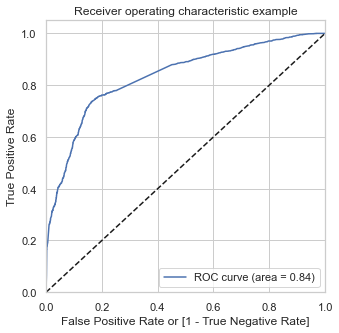

In [1755]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [1756]:
# Finding Optimal Cutoff Point:

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.228279,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.410243,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.228508,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.696653,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.778463,7987,1,1,1,1,1,1,1,1,1,0,0


In [1757]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.438829  0.994685  0.090653
0.2   0.2  0.638482  0.897383  0.476312
0.3   0.3  0.791529  0.751840  0.816389
0.4   0.4  0.797985  0.705642  0.855826
0.5   0.5  0.784758  0.633279  0.879641
0.6   0.6  0.769328  0.544563  0.910115
0.7   0.7  0.745237  0.431725  0.941613
0.8   0.8  0.724453  0.325020  0.974648
0.9   0.9  0.683829  0.186836  0.995134


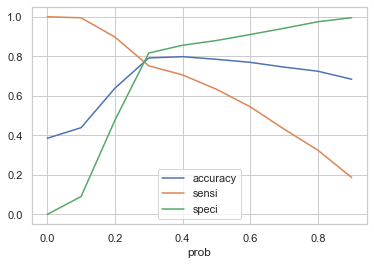

In [1758]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1759]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.228279,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.410243,1012,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.228508,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.696653,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.778463,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [1760]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7915288930877027

In [1761]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3188,  717],
       [ 607, 1839]], dtype=int64)

In [1762]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1763]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7518397383483238

In [1764]:
# Let us calculate specificity
TN / float(TN+FP)

0.8163892445582587

In [1765]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18361075544174135


In [1766]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7194835680751174


In [1767]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8400527009222661


In [1768]:
# Precision and Recall:

In [1769]:
# Using sklearn utilities for the same:

from sklearn.metrics import precision_score, recall_score

In [1770]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7672114908370481

In [1771]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.633278822567457

In [1772]:
# Precision and recall trade off:

from sklearn.metrics import precision_recall_curve

In [1773]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [1774]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

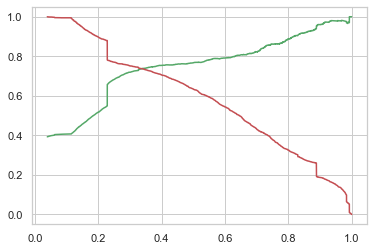

In [1775]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1776]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3271,0,0,4.0,157,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1490,0,0,5.0,1513,5.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7936,0,0,2.0,74,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4216,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,0,8.0,164,6.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [1777]:
# making Prediction on test set:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1778]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3271,0,0,0.284772,-0.600595,0.955505,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1490,0,0,0.643547,1.887326,1.510766,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7936,0,0,-0.432779,-0.752879,-0.155018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4216,0,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,0,1.719873,-0.587751,2.066027,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [1779]:
X_test=X_test[col8]

In [1780]:
X_test_sm = sm.add_constant(X_test)

In [1781]:
y_test_pred = res.predict(X_test_sm)

In [1782]:
y_test_pred[:10]

3271    0.152074
1490    0.980326
7936    0.131076
4216    0.888338
3830    0.153965
1800    0.713530
6507    0.144698
4821    0.348905
4223    0.888338
4714    0.228508
dtype: float64

In [1783]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1784]:
# Let's see the head
y_pred_1.head()

,0
3271,0.152074
1490,0.980326
7936,0.131076
4216,0.888338
3830,0.153965


In [1785]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1786]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [1787]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1788]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1789]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.152074
1,1,1490,0.980326
2,0,7936,0.131076
3,1,4216,0.888338
4,0,3830,0.153965


In [1790]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1791]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [1792]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.152074
1,1490,1,0.980326
2,7936,0,0.131076
3,4216,1,0.888338
4,3830,0,0.153965


In [1793]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [1794]:
y_pred_final.head()


,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.152074,0
1,1490,1,0.980326,1
2,7936,0,0.131076,0
3,4216,1,0.888338,1
4,3830,0,0.153965,0


In [1795]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.797282409107602

In [1796]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1435,  299],
       [ 253,  736]], dtype=int64)

In [1797]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1798]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7441860465116279

In [1799]:
# Let us calculate specificity
TN / float(TN+FP)

0.8275663206459054

In [1800]:
y_pred_final['Score'] = round(y_pred_final['Converted_Prob']*100,2)

In [1801]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Score
0,3271,0,0.152074,0,15.21
1,1490,1,0.980326,1,98.03
2,7936,0,0.131076,0,13.11
3,4216,1,0.888338,1,88.83
4,3830,0,0.153965,0,15.40
